In [1]:
import numpy as np 
import os.path 
import cv2 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches 
from models.face_recognition.align import AlignDlib 

In [7]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory 
        self.base = base 
        # identity name 
        self.name = name 
        # image file name 
        self.file = file 
    
    def __repr__(self):
        return self.image_path()
    
    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels 
    # in BGR order. So we need to reverse them 
    
    return img[...,::-1]
def load_metadata(path, upper_limit):
    metadata = []
    count = 0
    for i in sorted(os.listdir(path)):
        if count == upper_limit:
            break
        for f in sorted(os.listdir(os.path.join(path, i))):
            if count == upper_limit:
                break
            
            count += 1
            # Check the file extension 
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == ".jpeg":
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)
        

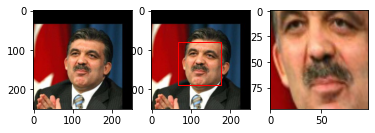

In [8]:
# load 100 identities 
metadata = load_metadata('data/lfw', 100)
# Initialize the OpenFace face alignment utility 
alignment = AlignDlib('models/landmarks.dat')
# load an image 
jc_orig = load_image(metadata[42].image_path())
# Detect face and return bounding box 
bb = alignment.getLargestFaceBoundingBox(jc_orig)
# Transform image using specified face landmark indices and crop image to 96 x 96 
jc_aligned = alignment.align(96, jc_orig, bb, landmarkIndices = AlignDlib.OUTER_EYES_AND_NOSE)

# Show original image
plt.subplot(1,3,1)
plt.imshow(jc_orig)

# Show original image with bounding box
plt.subplot(1,3,2)
plt.imshow(jc_orig)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

# Show aligned image
plt.subplot(1,3,3)
plt.imshow(jc_aligned);
